# Mini Project 2

**2025 Introduction to Quantiative Methods in Finance**

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt 
from scipy.optimize import minimize


In [2]:
tickers = ['GOOG', 'QUBT', 'QNST', 'PLTR', 'META', 'TSLA', 'AMD', 'JNJ', 'LOW', 'AAPL']

start_date = dt.datetime.today()-dt.timedelta(days=1825)
end_date = dt.datetime.today()

stock = yf.download(tickers, start = start_date, end =end_date, auto_adjust=True)

[*********************100%***********************]  10 of 10 completed


In [3]:
print(stock.shape)
print(stock.head())

(1254, 50)
Price           Close                                                \
Ticker           AAPL        AMD       GOOG         JNJ         LOW   
Date                                                                  
2020-07-06  90.852005  53.400002  74.343094  124.058273  124.190918   
2020-07-07  90.570114  52.930000  73.820198  123.945473  123.514008   
2020-07-08  92.679497  53.430000  74.358009  124.309914  124.181786   
2020-07-09  93.078064  57.259998  75.103081  123.633133  124.053726   
2020-07-10  93.240868  55.880001  76.631485  123.528999  125.718628   

Price                                                 ...     Volume  \
Ticker            META PLTR   QNST  QUBT        TSLA  ...       AAPL   
Date                                                  ...              
2020-07-06  238.968994  NaN  10.58  2.55   91.438667  ...  118655600   
2020-07-07  239.545853  NaN  10.22  2.22   92.657333  ...  112424400   
2020-07-08  242.251007  NaN  10.35  2.05   91.058670  ...  1

In [4]:
print(stock.columns)


MultiIndex([( 'Close', 'AAPL'),
            ( 'Close',  'AMD'),
            ( 'Close', 'GOOG'),
            ( 'Close',  'JNJ'),
            ( 'Close',  'LOW'),
            ( 'Close', 'META'),
            ( 'Close', 'PLTR'),
            ( 'Close', 'QNST'),
            ( 'Close', 'QUBT'),
            ( 'Close', 'TSLA'),
            (  'High', 'AAPL'),
            (  'High',  'AMD'),
            (  'High', 'GOOG'),
            (  'High',  'JNJ'),
            (  'High',  'LOW'),
            (  'High', 'META'),
            (  'High', 'PLTR'),
            (  'High', 'QNST'),
            (  'High', 'QUBT'),
            (  'High', 'TSLA'),
            (   'Low', 'AAPL'),
            (   'Low',  'AMD'),
            (   'Low', 'GOOG'),
            (   'Low',  'JNJ'),
            (   'Low',  'LOW'),
            (   'Low', 'META'),
            (   'Low', 'PLTR'),
            (   'Low', 'QNST'),
            (   'Low', 'QUBT'),
            (   'Low', 'TSLA'),
            (  'Open', 'AAPL'),
        

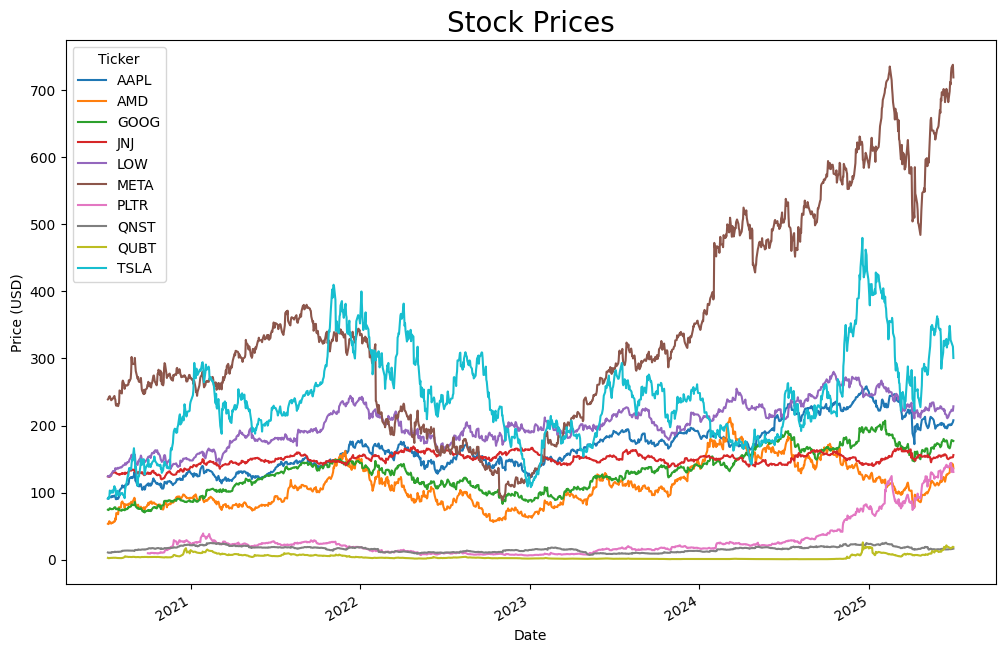

In [5]:
#Plot stock (close) prices together
stock['Close'].plot(figsize = (12,8))
plt.title(f'Stock Prices', size = 20)
plt.ylabel('Price (USD)')
plt.show()

In [6]:
daily_log_returns = np.log(stock['Close']/ stock['Close'].shift(1)).dropna()
print(daily_log_returns.head())

Ticker          AAPL       AMD      GOOG       JNJ       LOW      META  \
Date                                                                     
2020-10-01  0.008426  0.034406  0.013846 -0.010534  0.007867  0.017899   
2020-10-02 -0.032813 -0.036726 -0.021483 -0.007358 -0.004076 -0.025411   
2020-10-05  0.030326  0.051813  0.018748  0.013516  0.012238  0.017957   
2020-10-06 -0.029088 -0.019575 -0.022168 -0.013379 -0.021288 -0.022894   
2020-10-07  0.016825  0.025824  0.004702  0.011015  0.020873 -0.002090   

Ticker          PLTR      QNST      QUBT      TSLA  
Date                                                
2020-10-01 -0.004219  0.040216  0.021449  0.043670  
2020-10-02 -0.027869  0.019220  0.007926 -0.076655  
2020-10-05 -0.018651  0.008294  0.013072  0.025193  
2020-10-06  0.091982 -0.025091 -0.002601 -0.027870  
2020-10-07  0.010050  0.004226  0.018065  0.026977  


In [7]:
print(daily_log_returns.shape)
print(daily_log_returns.columns)

(1192, 10)
Index(['AAPL', 'AMD', 'GOOG', 'JNJ', 'LOW', 'META', 'PLTR', 'QNST', 'QUBT',
       'TSLA'],
      dtype='object', name='Ticker')


In [15]:
#Normality Test using Shapiro-Wilk and D'Agostino-Pearson
from scipy.stats import shapiro, normaltest

def normality_tests(series):
    # Drop missing values
    series = series.dropna()
    
    # Shapiro-Wilk Test
    sw_stat, sw_prob = shapiro(series)
    
    # D'Agostion-Pearson Test
    dp_stat, dp_prob = normaltest(series)
    
    # Return dictionary of results
    return {
        "Shapiro-Wilk (prob)": round(sw_prob, 5),
        "D'Agostino-Pearson (stat)": round(dp_prob, 5)
    }


In [9]:
# Run Normality Tests
results = {ticker: normality_tests(daily_log_returns[ticker]) for ticker in tickers}
normality_df = pd.DataFrame(results).T
print("Full Data Normality Test Results:")
print(normality_df)

Full Data Normality Test Results:
      Shapiro-Wilk (prob)  D'Agostino-Pearson (stat)
GOOG                  0.0                        0.0
QUBT                  0.0                        0.0
QNST                  0.0                        0.0
PLTR                  0.0                        0.0
META                  0.0                        0.0
TSLA                  0.0                        0.0
AMD                   0.0                        0.0
JNJ                   0.0                        0.0
LOW                   0.0                        0.0
AAPL                  0.0                        0.0


This result leads us to conclude that none of the stocks in our list "look" normal on the full interval of 1825 days. We will confirm this below with some visual inspections like those done in class.

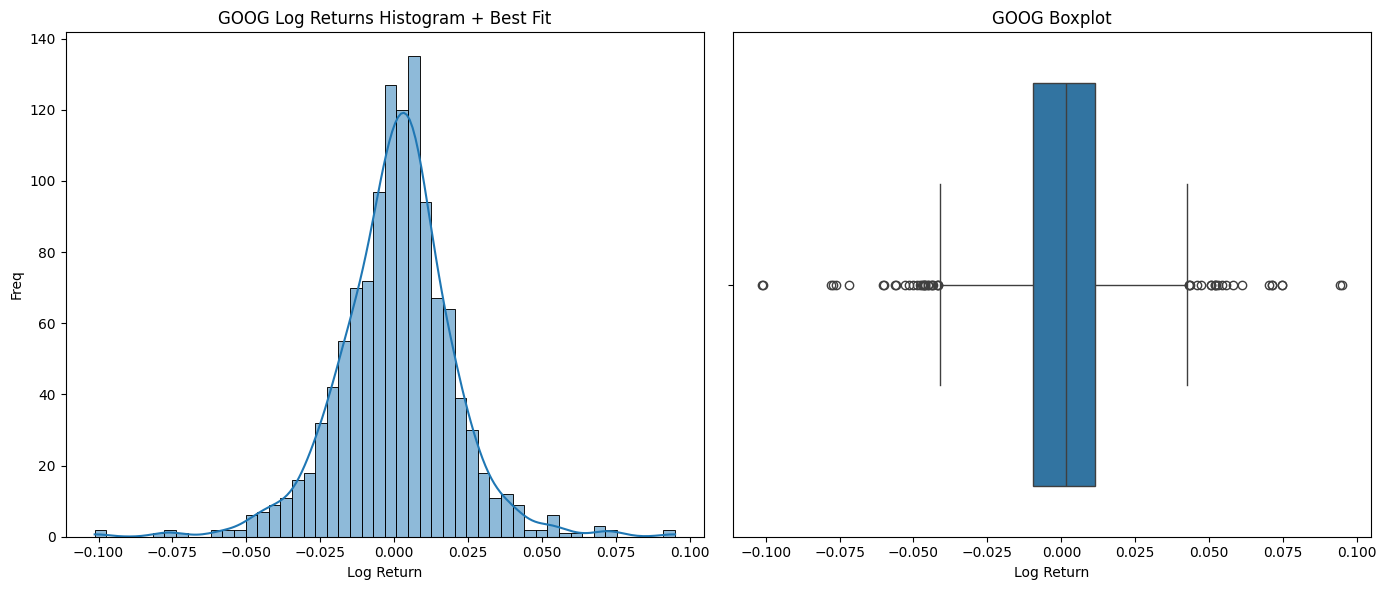

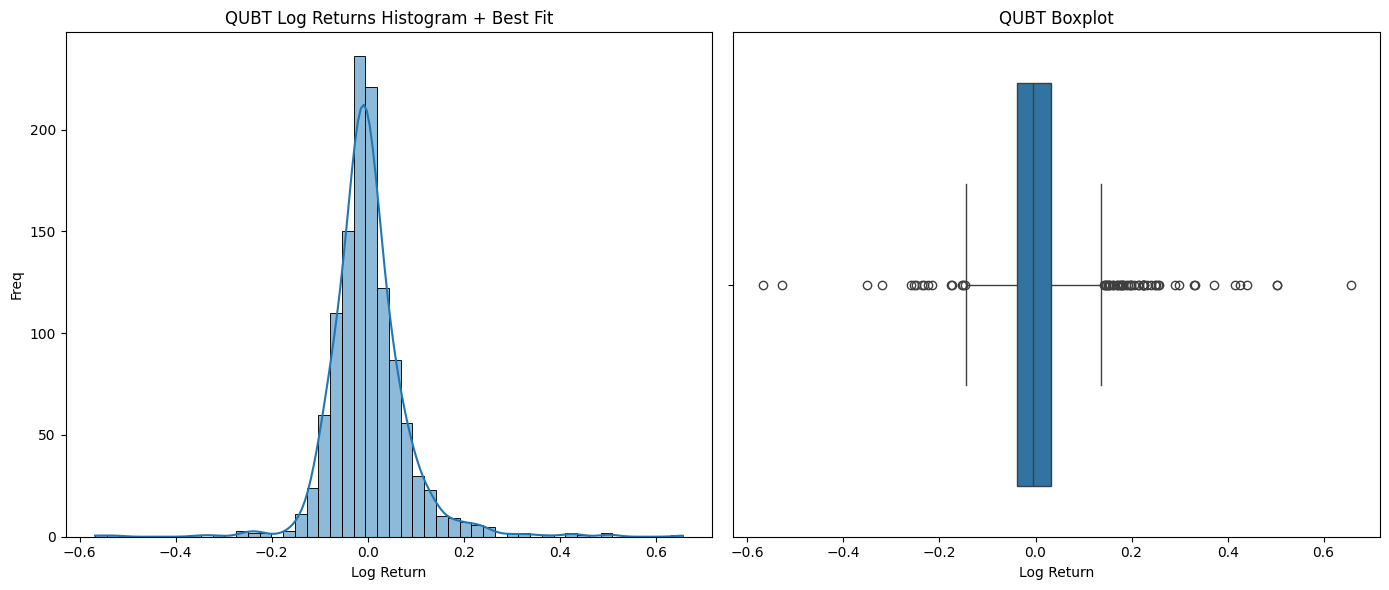

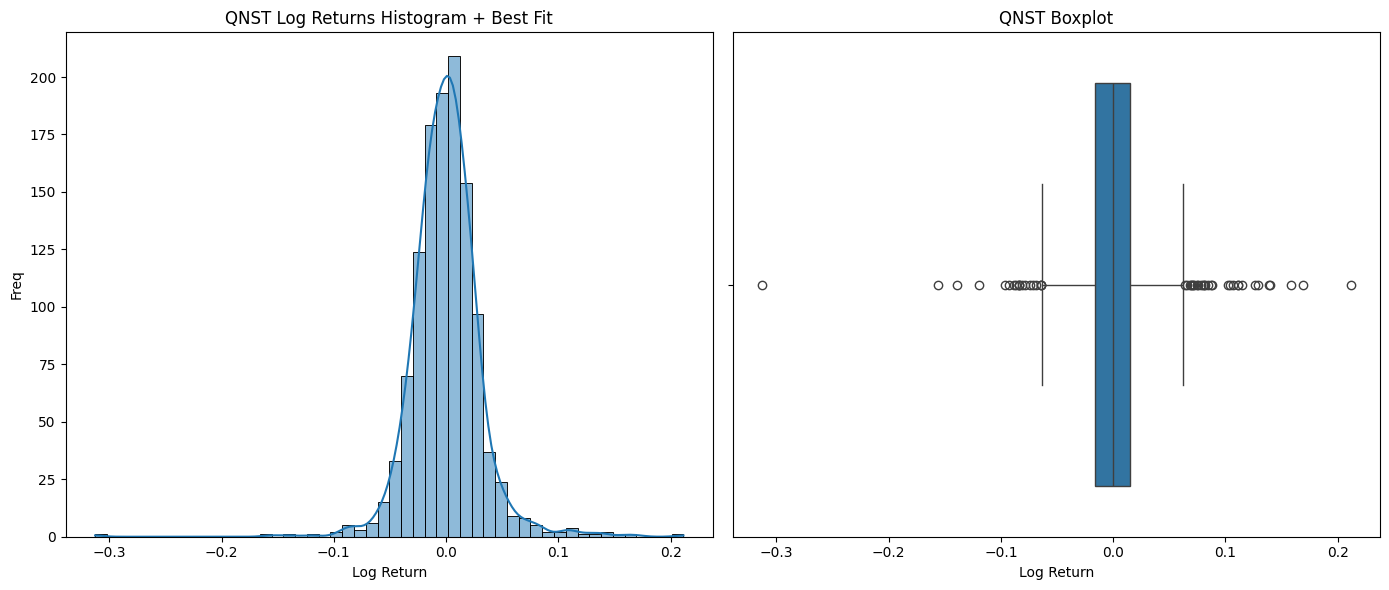

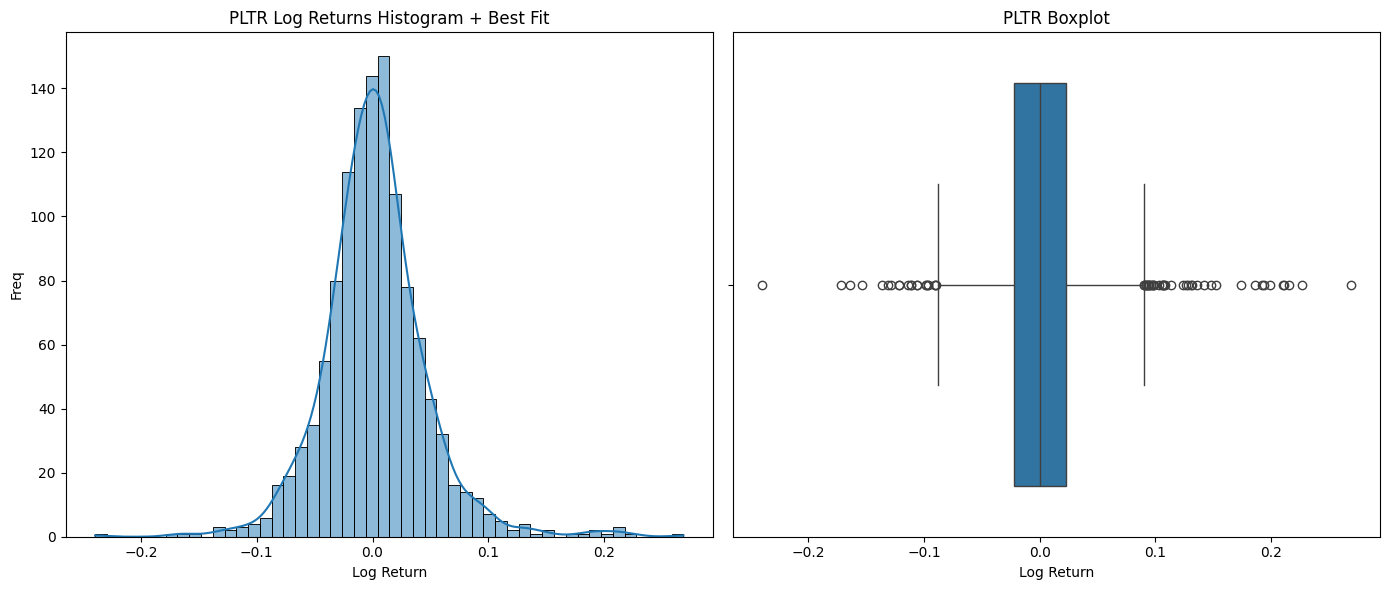

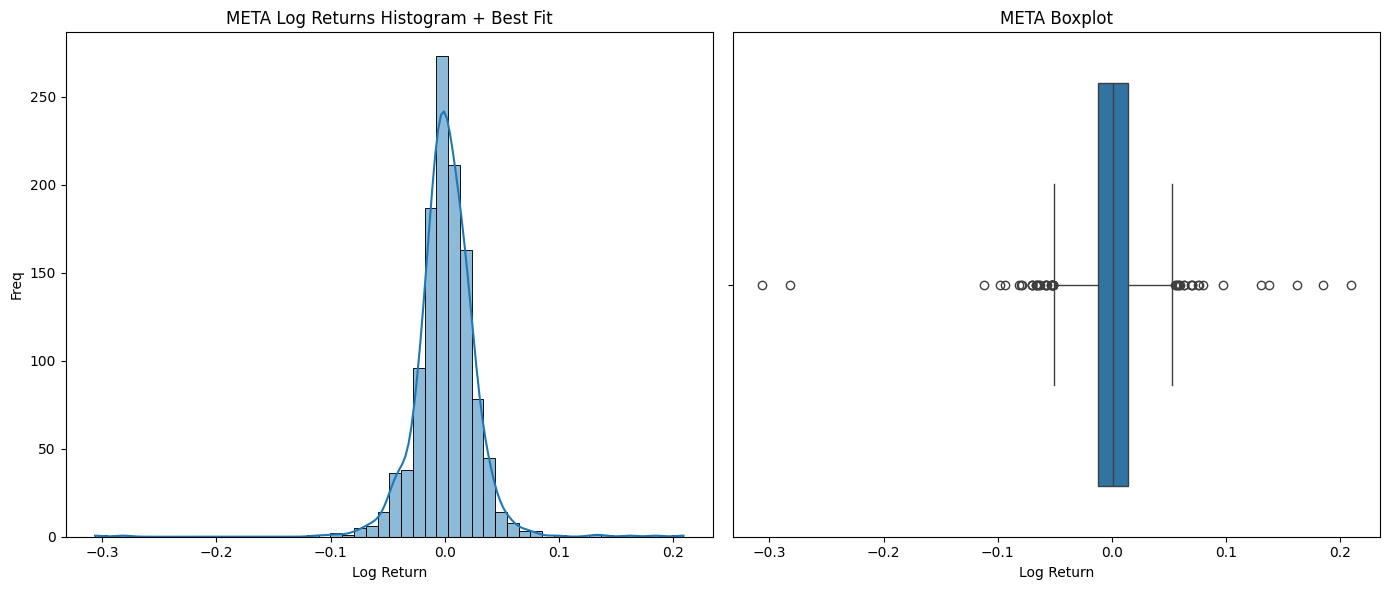

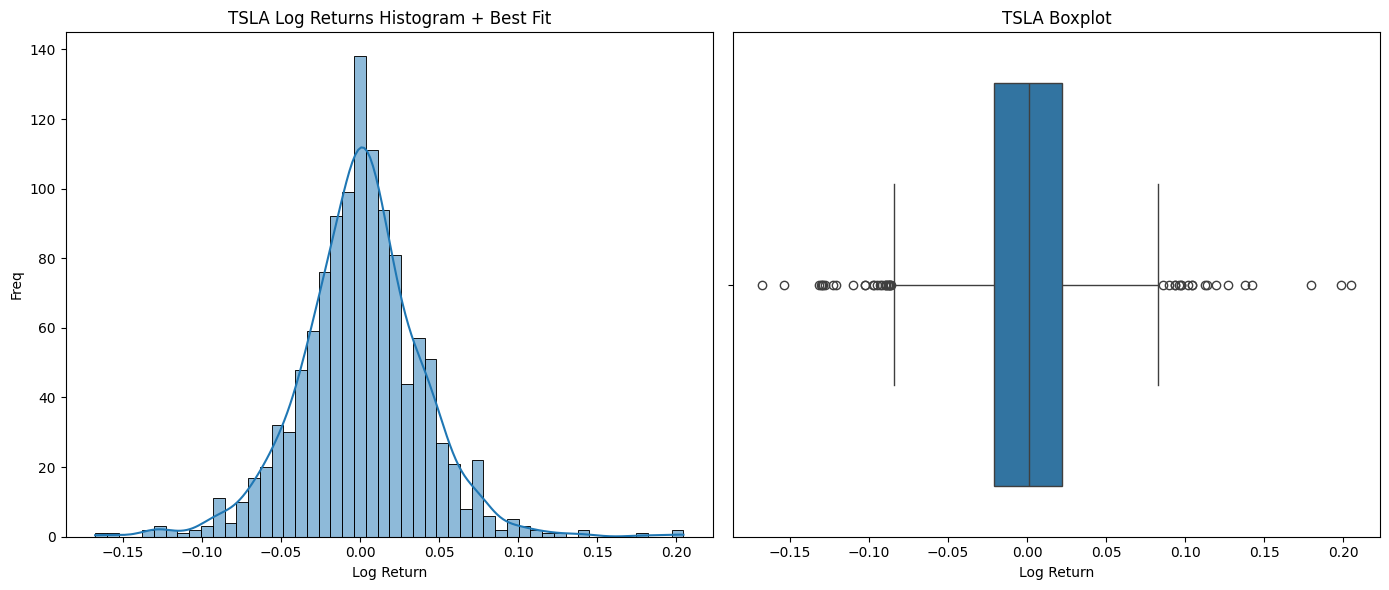

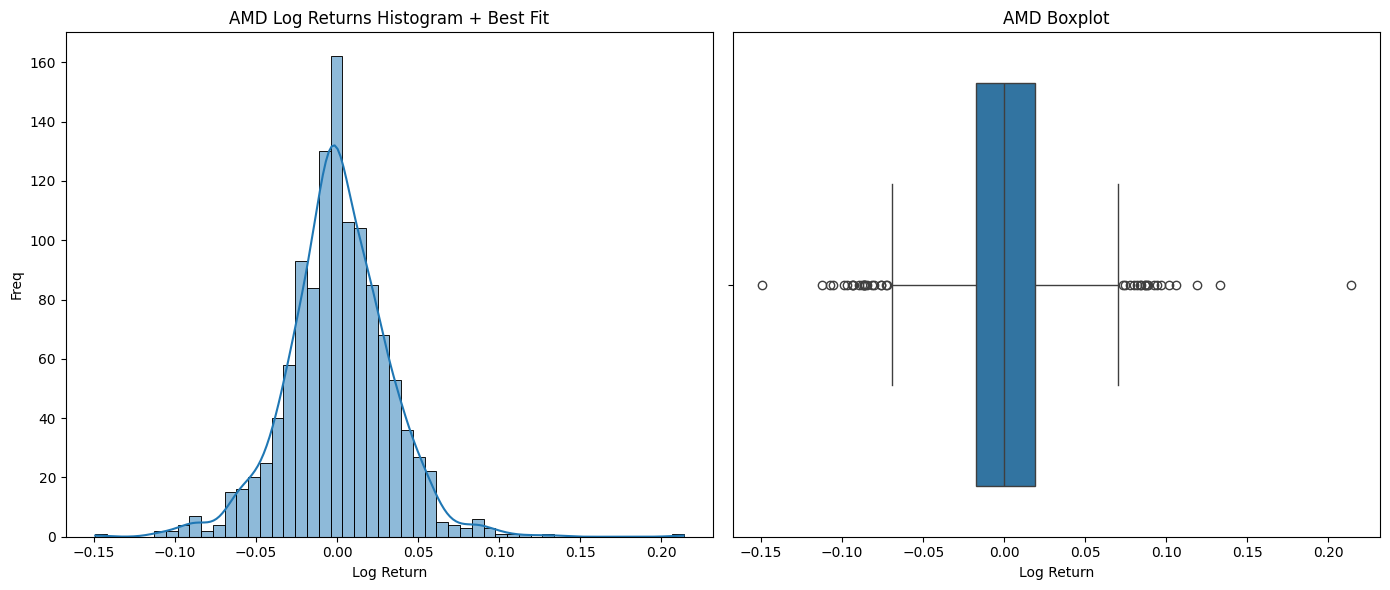

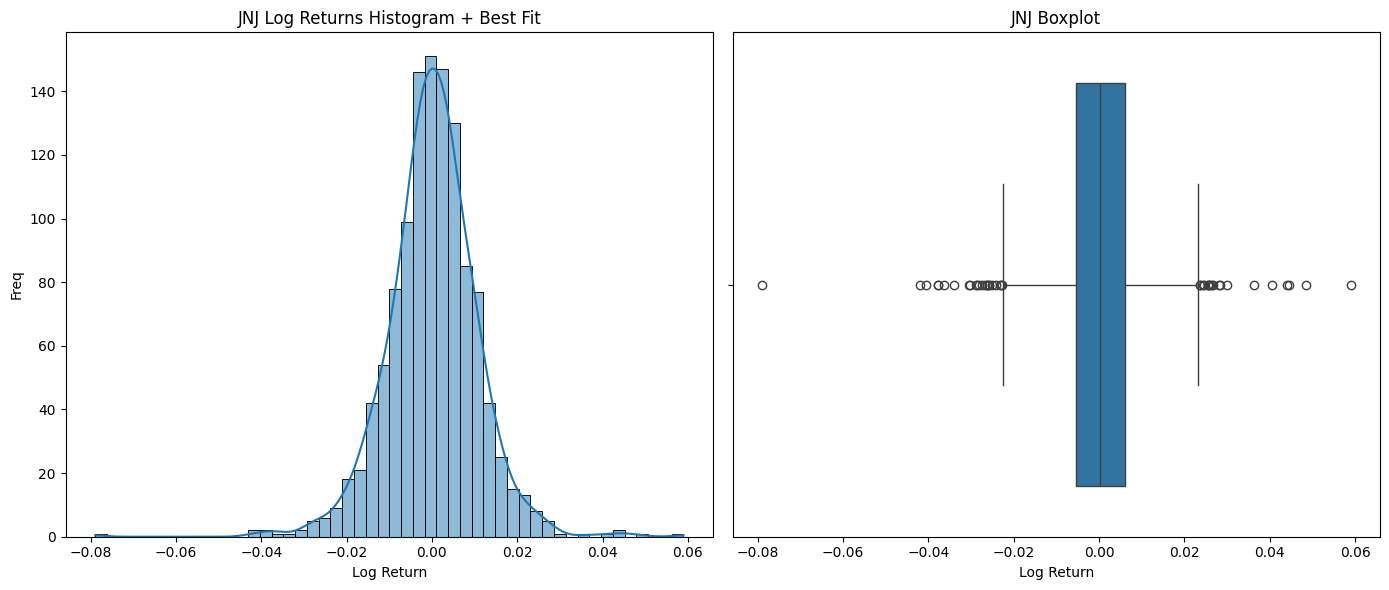

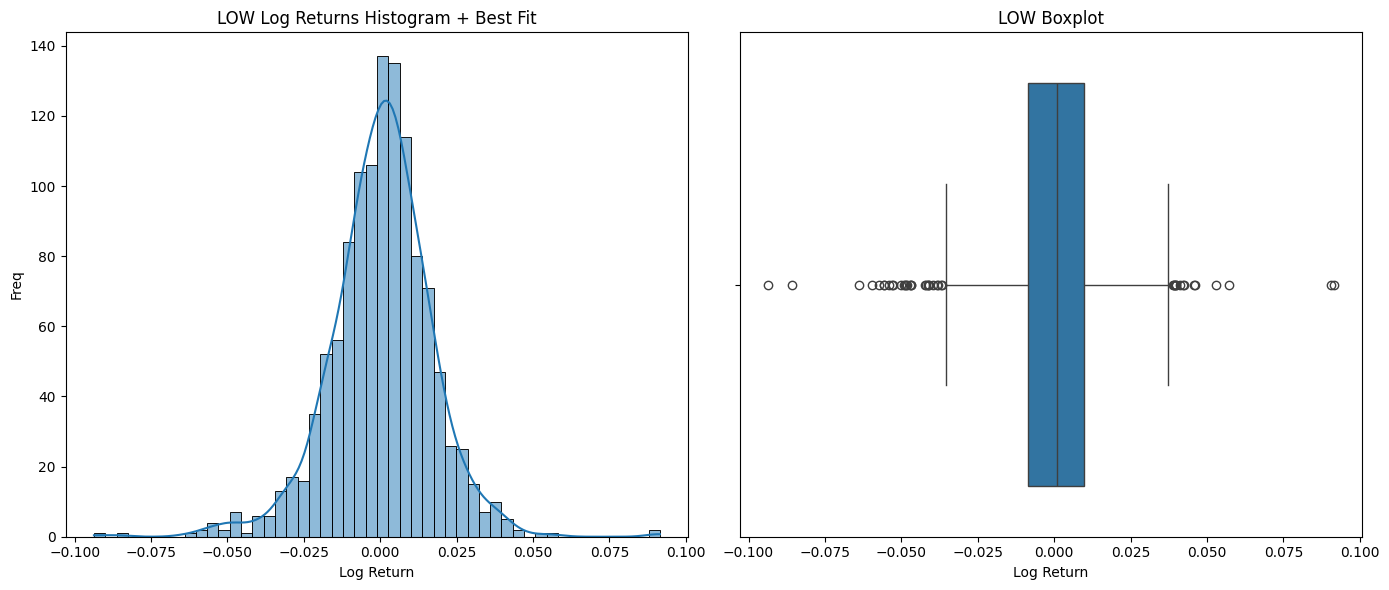

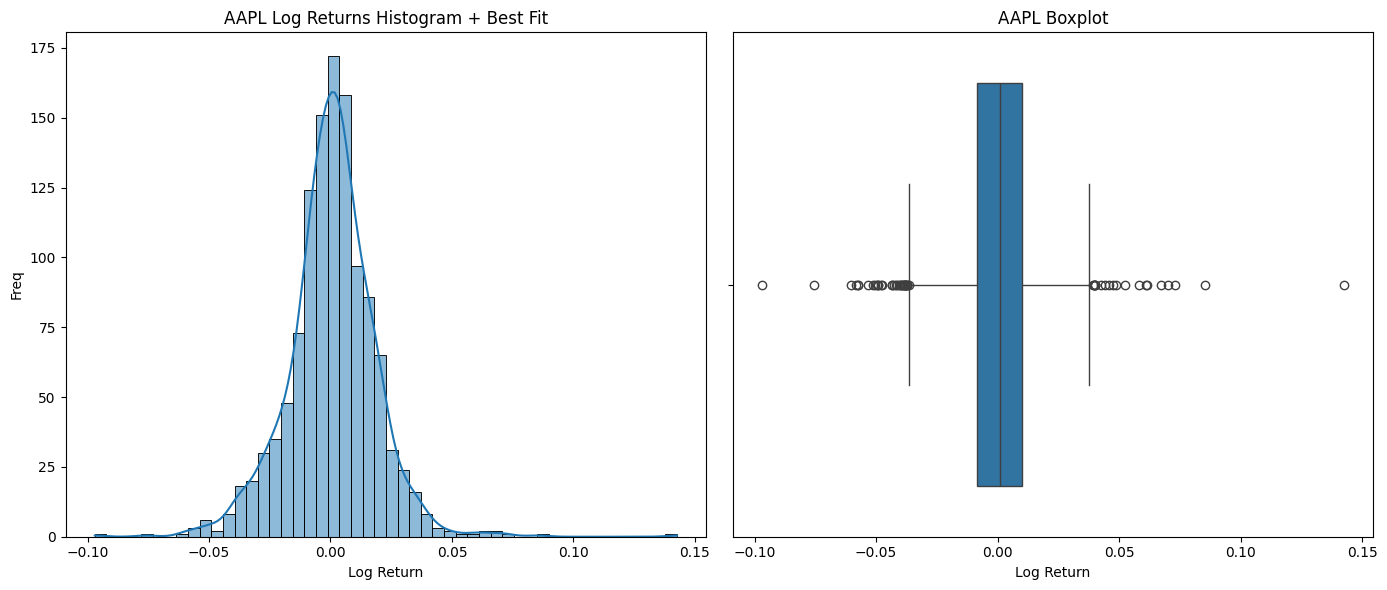

In [10]:
# Visual Diagnostics for Each Stock
for stock in tickers:
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # Histogram test
    sns.histplot(daily_log_returns[stock], bins=50, kde=True, ax=axs[0])
    axs[0].set_title(f"{stock} Log Returns Histogram + Best Fit")
    axs[0].set_xlabel("Log Return")
    axs[0].set_ylabel("Freq")


    # Boxplot test
    sns.boxplot(x=daily_log_returns[stock], ax=axs[1])
    axs[1].set_title(f"{stock} Boxplot")
    axs[1].set_xlabel("Log Return")

    plt.tight_layout()
    plt.show()

## Dropping outliers

In [11]:
def pruned_normality(series, outlier_percent=0.05):
    """
    Function to test for normality using our above approach (SW and DP), but this time with outliers pruned from the data.

    :series: The series of stock values from yfinance
    :outlier_percent: The percentage of outliers to prune from the data (on BOTH) sides

    """

    series = series.dropna()
    lower = series.quantile(outlier_percent)
    upper = series.quantile(1 - outlier_percent)
    pruned = series[(series >= lower) & (series <= upper)]

    sw_prob = shapiro(pruned)[1]
    dp_prob = normaltest(pruned)[1]

    return {
        'SW prob': round(sw_prob, 7),
        'DP prob': round(dp_prob, 7)
    }, pd.DataFrame(pruned).T


pruned_results = {}

for stock in daily_log_returns.columns:
    pruned_results[stock] = pruned_normality(daily_log_returns[stock])[0]

pruned_normality_df = pd.DataFrame(pruned_results).T

print("Trimmed Data Normality Test Results:")
print(pruned_normality_df)


Trimmed Data Normality Test Results:
           SW prob       DP prob
AAPL  1.600000e-06  2.883000e-04
AMD   1.030000e-05  4.800000e-06
GOOG  8.000000e-07  8.000000e-07
JNJ   9.000000e-07  1.000000e-07
LOW   1.900000e-06  0.000000e+00
META  1.142000e-04  1.182800e-03
PLTR  1.595000e-04  1.605000e-03
QNST  1.500000e-06  0.000000e+00
QUBT  0.000000e+00  9.600000e-06
TSLA  2.300000e-06  3.000000e-06


Unfortunately this didn't work so well and most are still presenting as not normal. We can inspect them visually as well.

Visual Comparison of Normality (Before vs After Trimming)

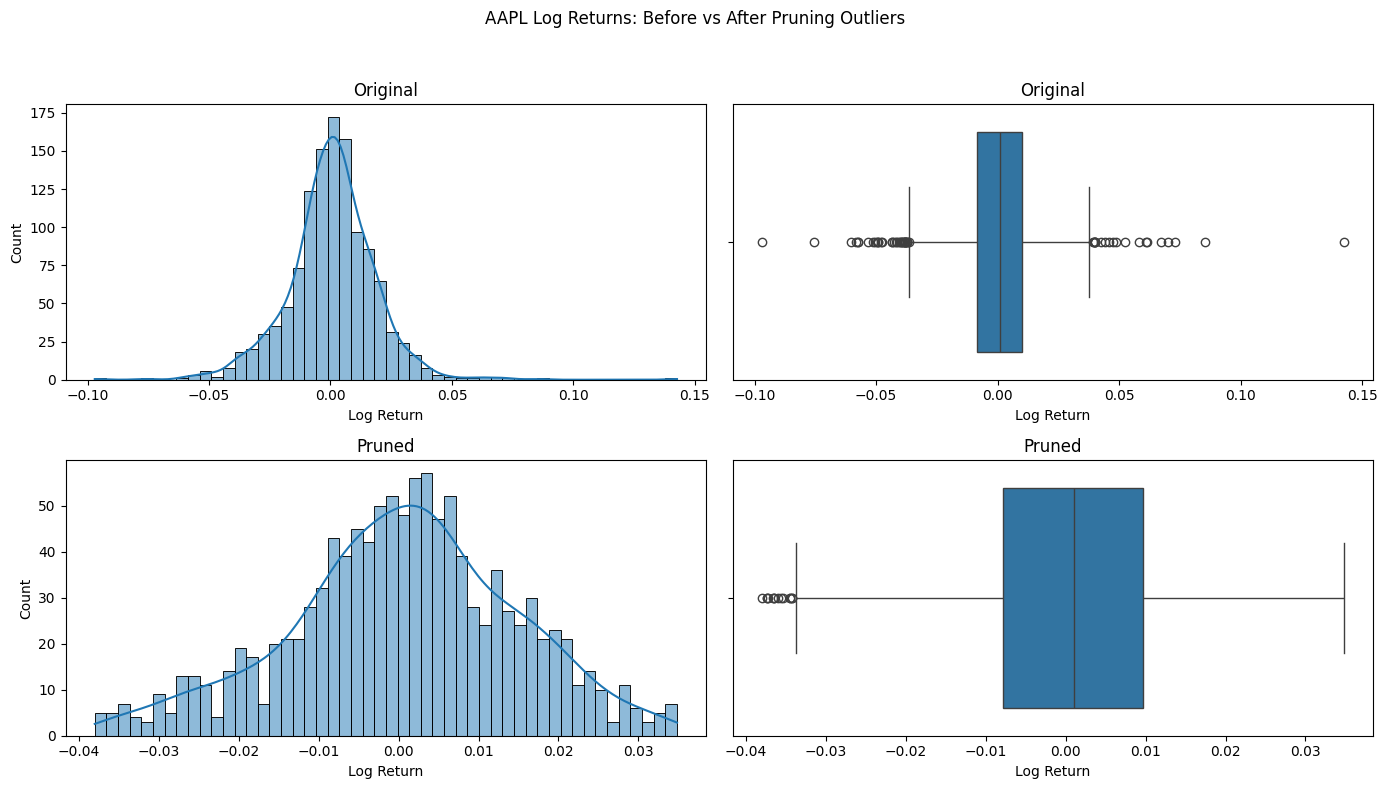

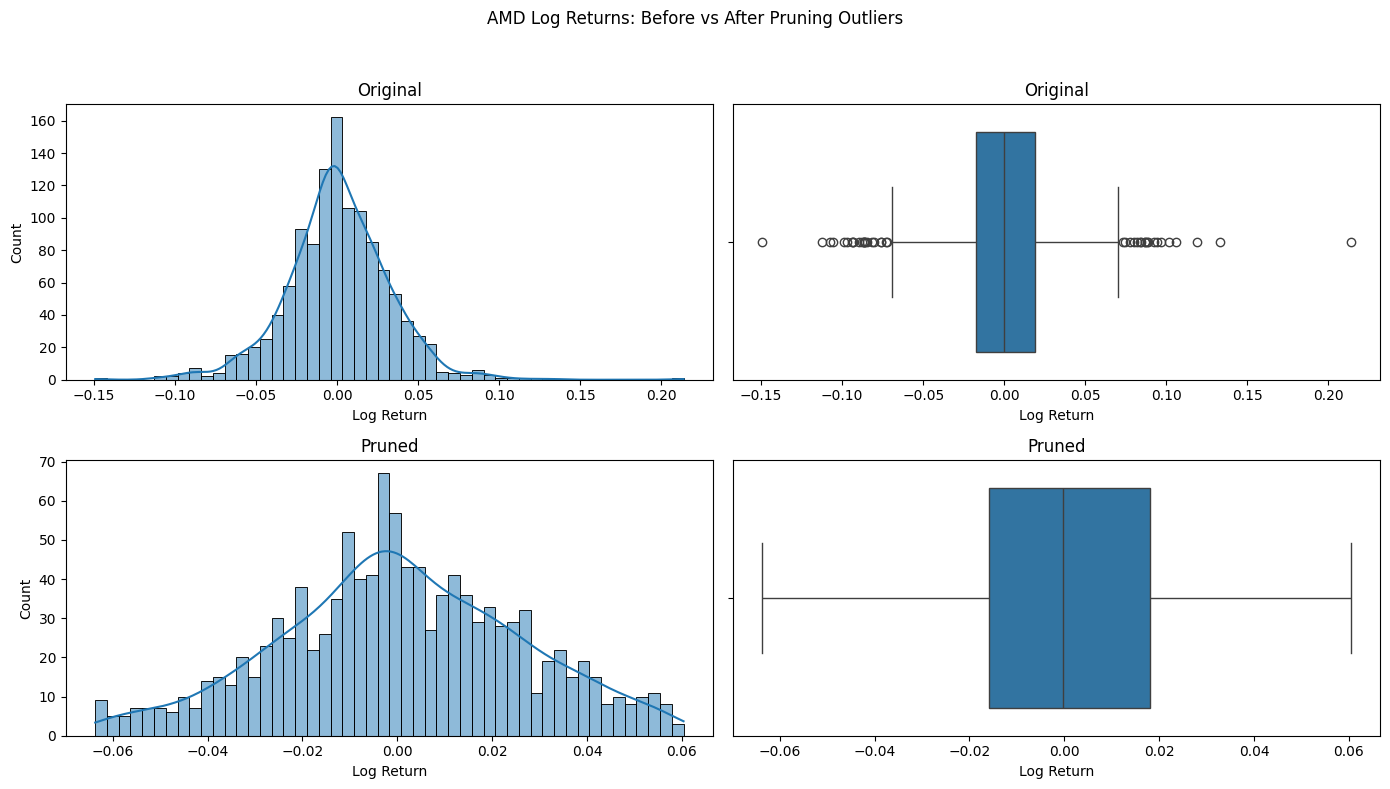

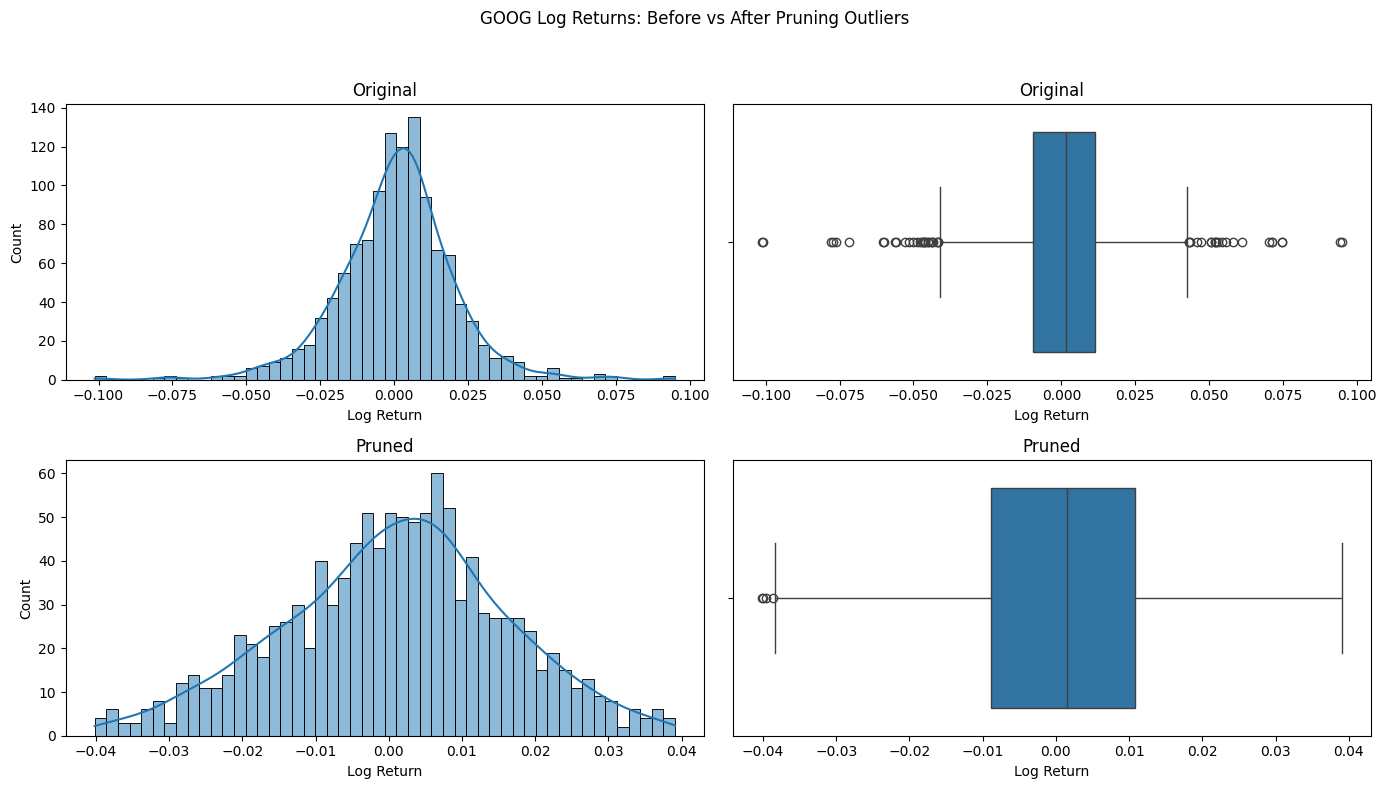

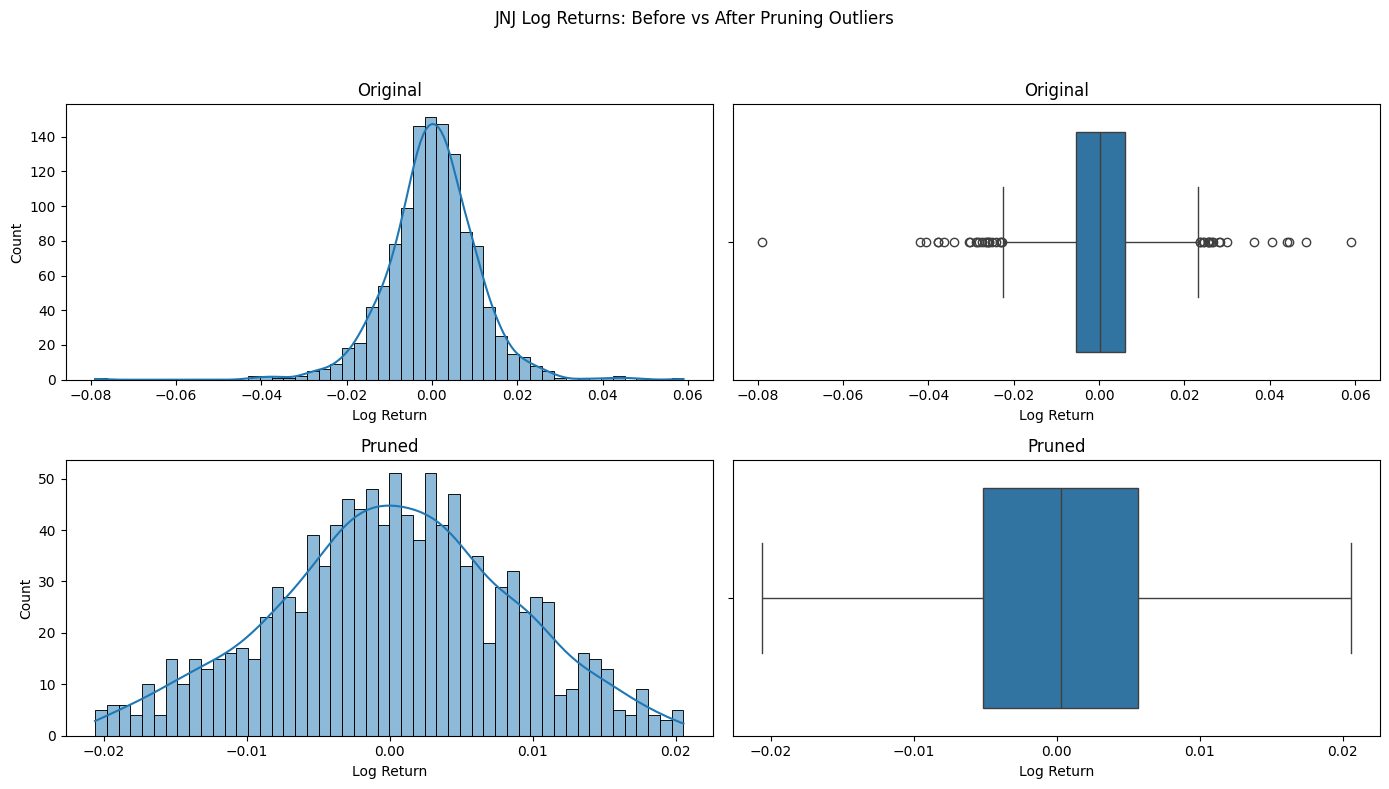

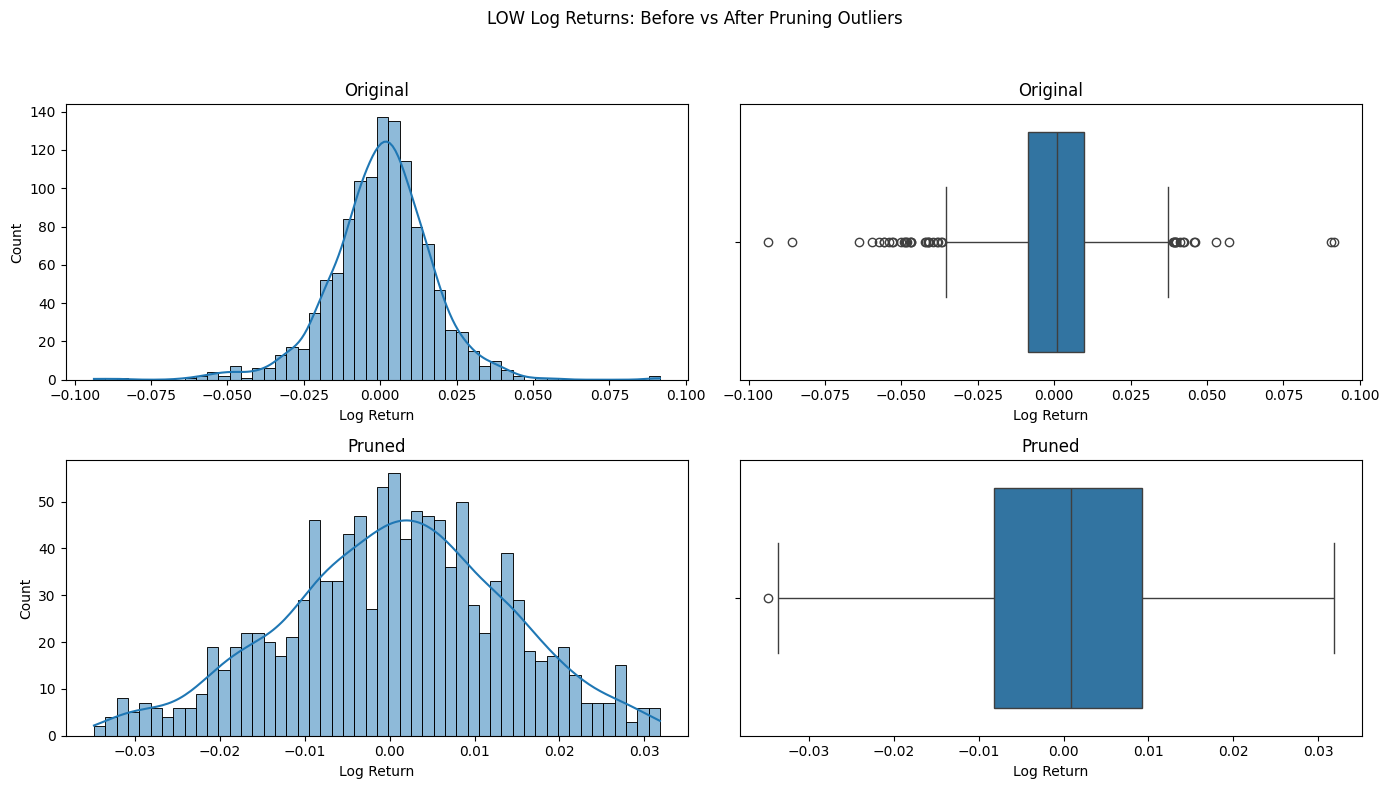

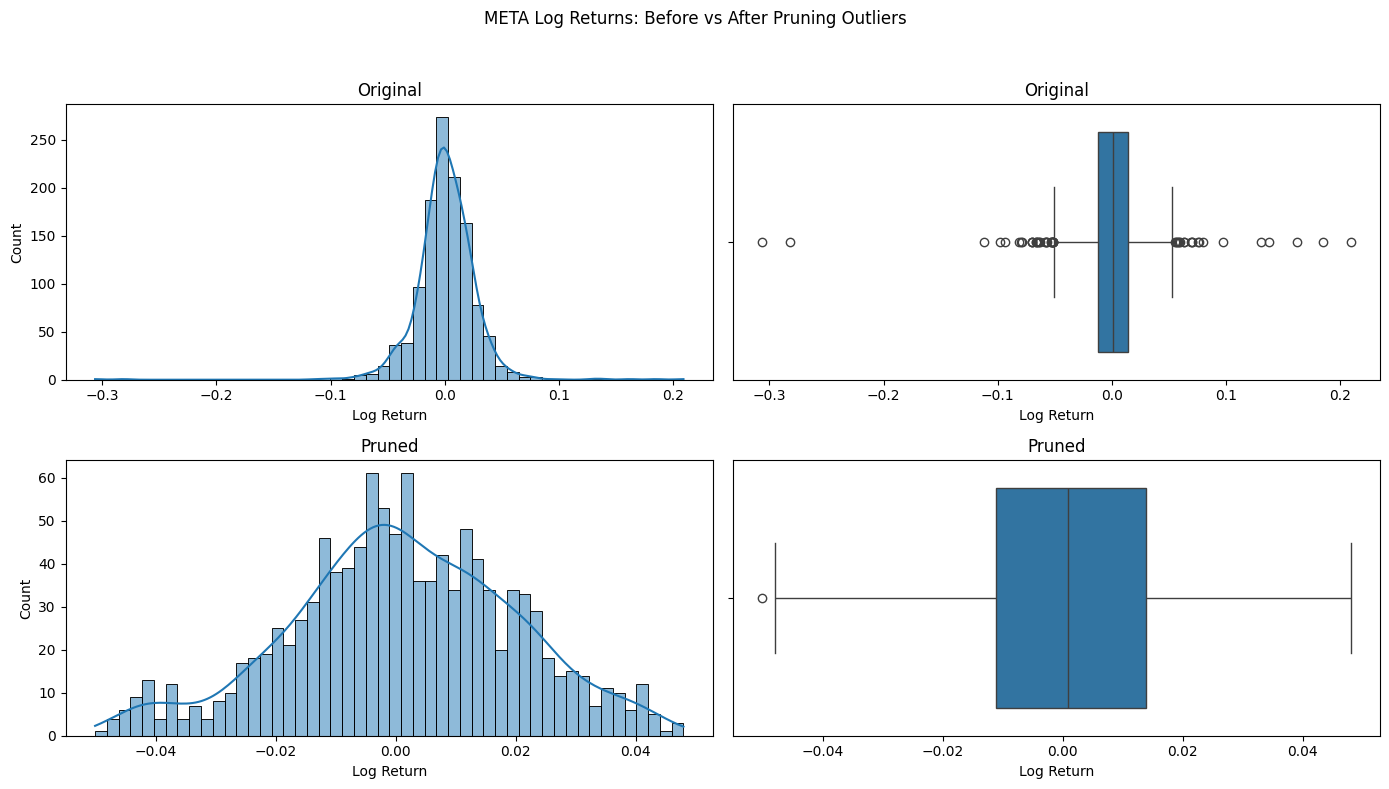

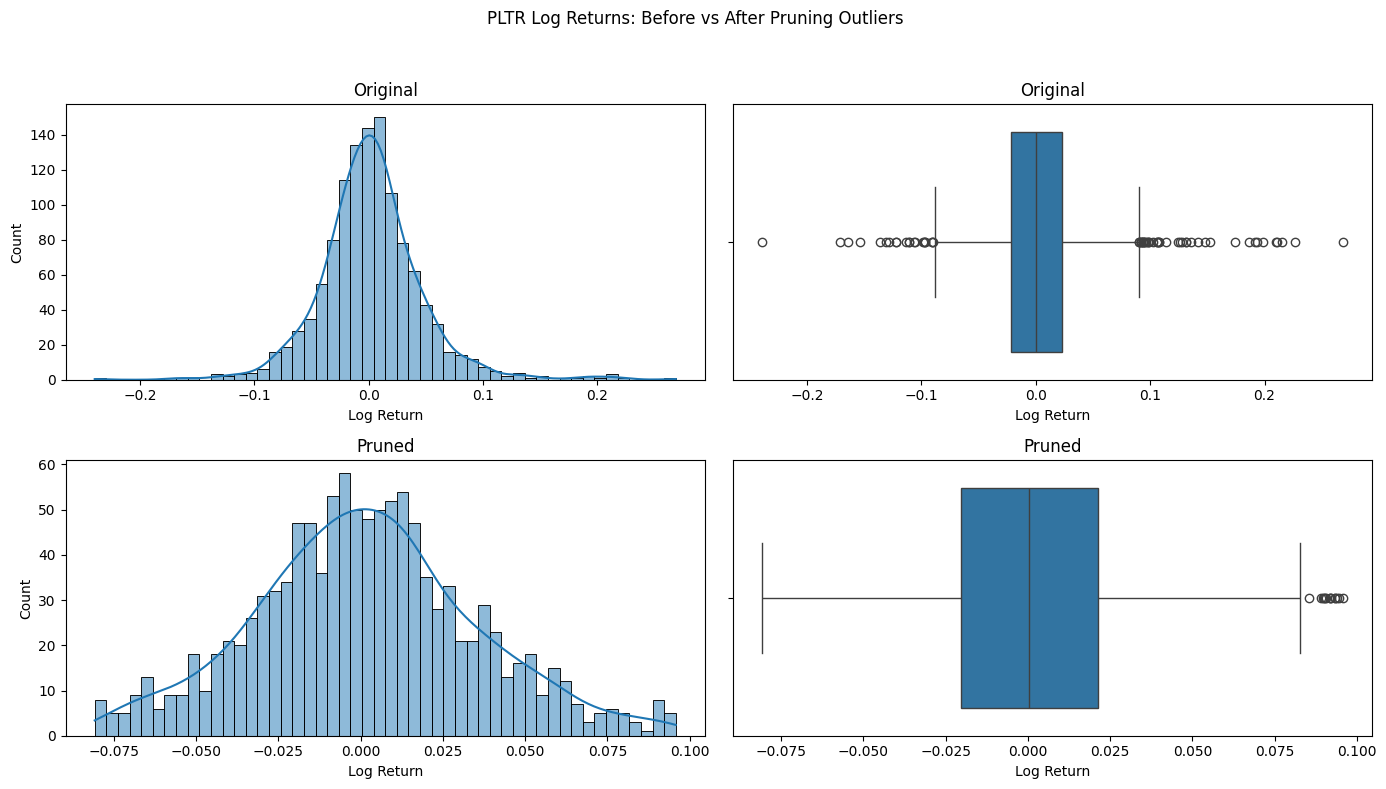

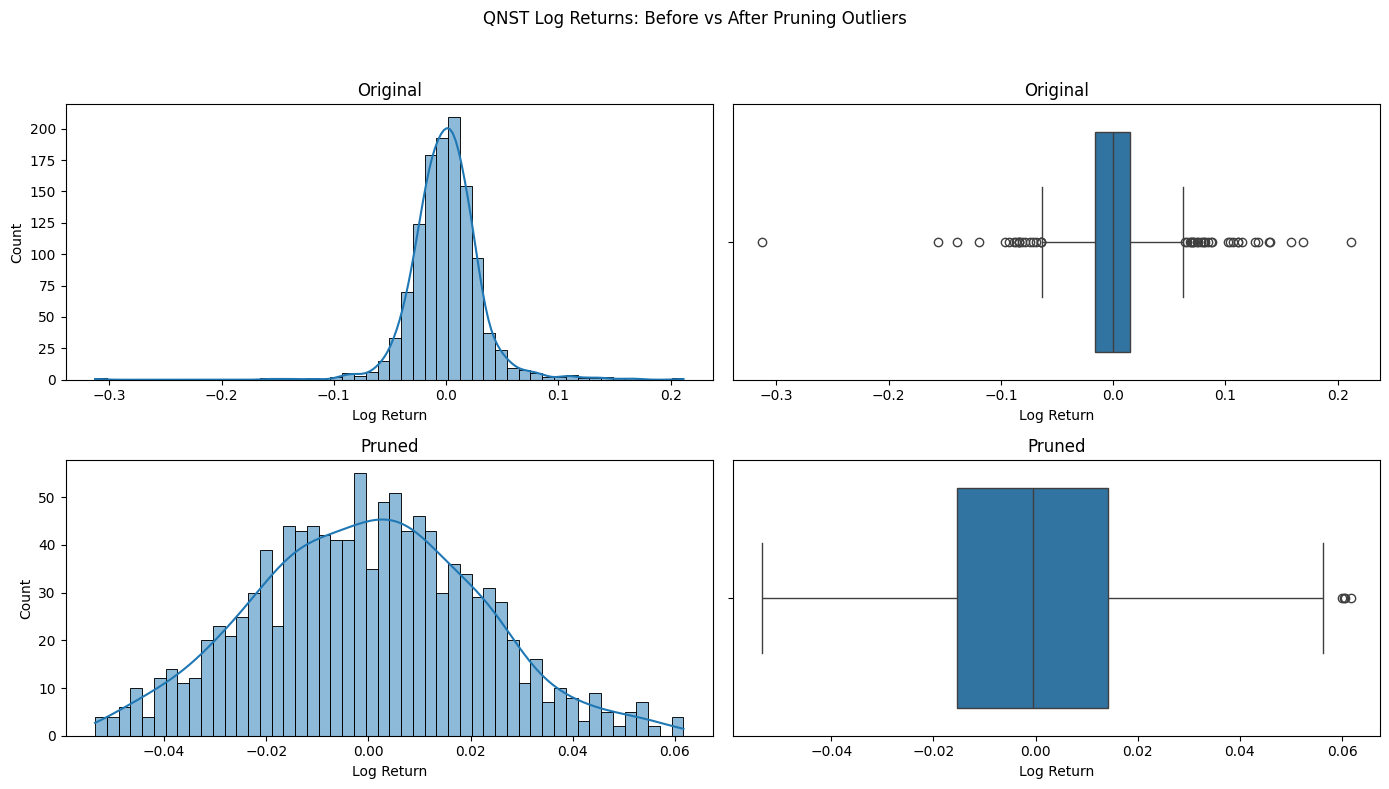

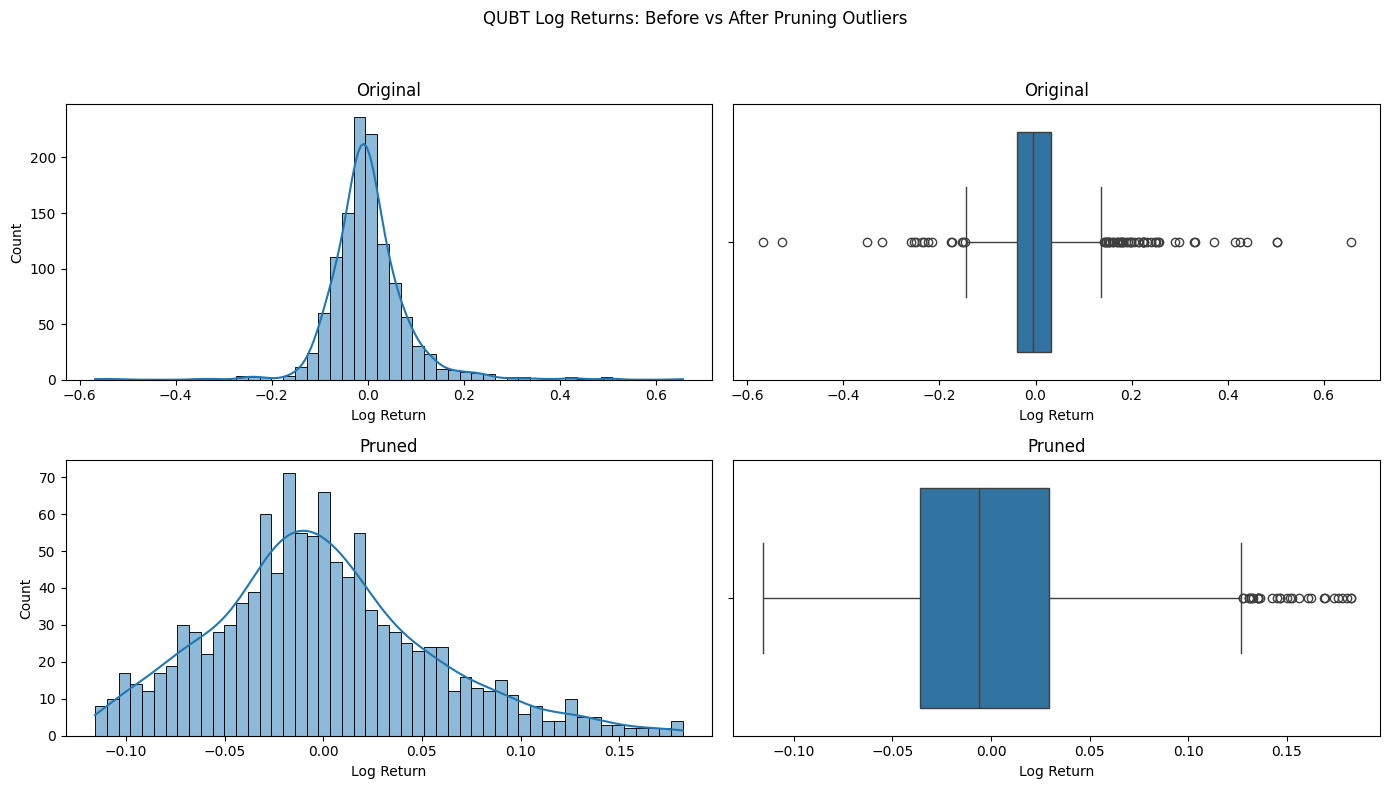

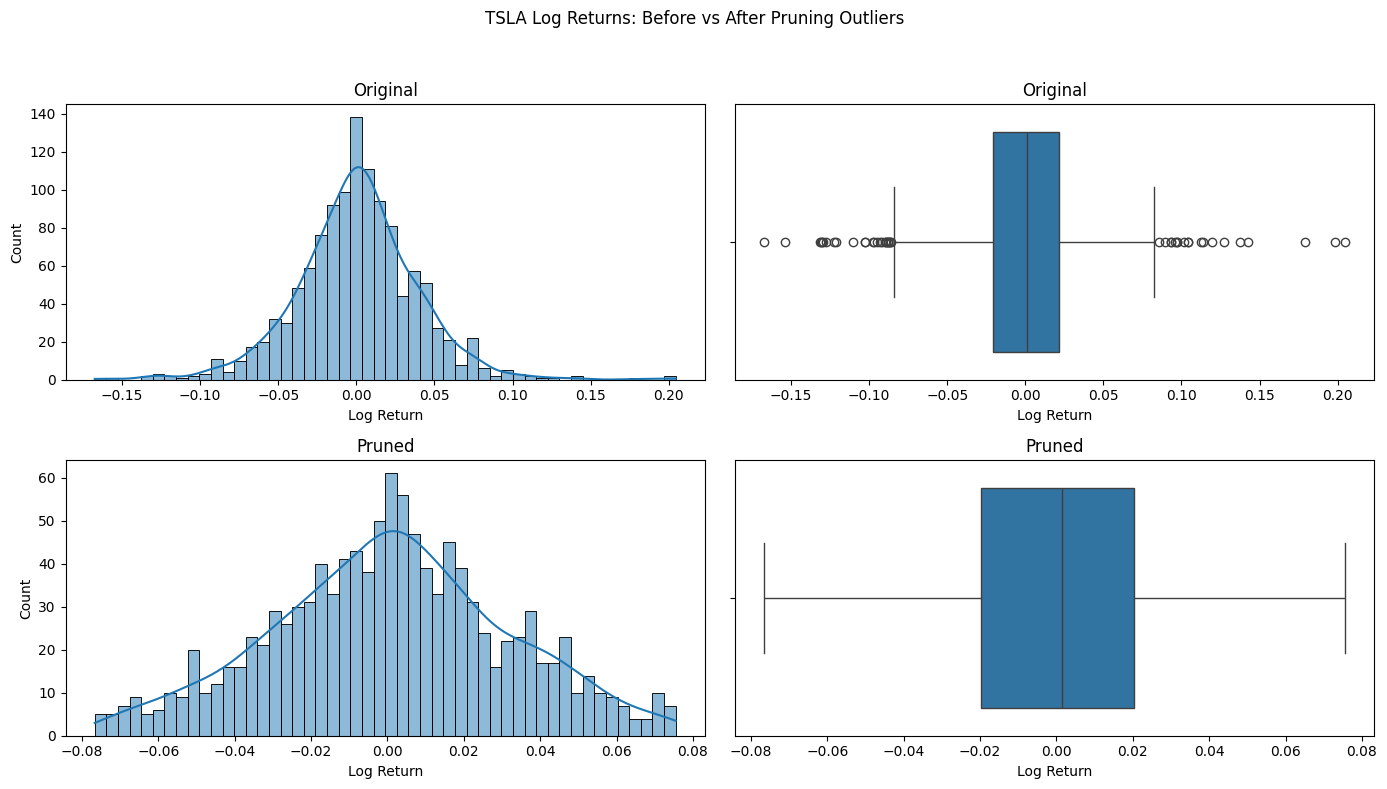

In [12]:
for stock in daily_log_returns.columns:

    outlier_percent = .025    
    original = daily_log_returns[stock].dropna()

    lower = original.quantile(outlier_percent)
    upper = original.quantile(1-outlier_percent)
    pruned = original[(original >= lower) & (original <= upper)]


    fig, axs = plt.subplots(2, 2, figsize=(14, 8))
    fig.suptitle(f"{stock} Log Returns: Before vs After Pruning Outliers")

    # Histogram + Best Fit
    sns.histplot(original, bins=50, kde=True, ax=axs[0, 0])
    axs[0, 0].set_title("Original")
    axs[0, 0].set_xlabel("Log Return")

    sns.histplot(pruned, bins=50, kde=True, ax=axs[1, 0])
    axs[1, 0].set_title("Pruned")
    axs[1, 0].set_xlabel("Log Return")

    # Boxplots
    sns.boxplot(x = original, ax=axs[0, 1])
    axs[0, 1].set_title("Original")
    axs[0, 1].set_xlabel("Log Return")

    sns.boxplot(x = pruned, ax=axs[1, 1])
    axs[1, 1].set_title("Pruned")
    axs[1, 1].set_xlabel("Log Return")
    


    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

Visually, it looks like 5% is a bit much, but dialing in at 2.5% seems to help things look more normal with the more "stable" stocks such as META, GOOGL, AAPL, and MSFT. Now we will utilize the principles learned in class to create a portfolio of stocks with historical log return data that is (collectively) normally distributed.

In [13]:
selected_stocks = [ 'META', 'PLTR', 'LOW']

outlier_percent = 0.0001

pruned_returns = {}


for stock in selected_stocks:
    series = daily_log_returns[stock].dropna()
    lower = series.quantile(outlier_percent)
    upper = series.quantile(1 - outlier_percent)
    pruned = series[(series >= lower) & (series <= upper)]
    pruned_returns[stock] = pruned
pruned_df = pd.DataFrame(pruned_returns).dropna()

weights = np.array([1/len(selected_stocks)] * len(selected_stocks))
portfolio_pruned = pruned_df.dot(weights)

pruned_normality(portfolio_pruned)[0]


{'SW prob': np.float64(0.0001521), 'DP prob': np.float64(0.0030905)}

Our two tests much more closely support the conclusion that your portfolio log returns are normally distributed — after constructing it from pruned individual stock returns. Although this is slightly dishonest statistics since I converged on the highest scoring collection of stocks on the hypotheis test.

### Normality Test on Mini Project 1 Portfolios

In Mini Project 1 we constructed two portfolios: one exhibiting high-risk and one low. We now assess whether the optimized high-risk and low-risk portfolios from Mini Project 1 exhibit normally distributed behavior in the shorter, 1 year time period.

In [14]:
# Define weights from Mini Project 1
high_risk_weights = {
    'TSLA': 3.39,
    'QUBT': 66.88,
    'QNST': 17.41,
    'JNJ': 12.32,
}

low_risk_weights = {
    'AAPL': 30.23,
    'PLTR': 10.00,
    'LOW': 49.84,
    'QNST': 8.80,
    'JNJ': 1.14
}

# Compute portfolio returns
def compute_portfolio_returns(weights_dict, returns_df):
    tickers = list(weights_dict.keys()) #stocks in the portfolio
    weights = np.array([weights_dict[t] for t in tickers])
    weights = weights / weights.sum()
    return returns_df[tickers].dropna().dot(weights) #daily weighted return

high_returns = compute_portfolio_returns(high_risk_weights, daily_log_returns)
low_returns = compute_portfolio_returns(low_risk_weights, daily_log_returns)


def DP_test(series, window_size=365):
    results = []
    dates = series.index[window_size:]
    for i in range(len(dates)):
        window = series.iloc[i:i+window_size]
        DP_stat = normaltest(window)
        passed = DP_stat[1] > .05  # 5% level
        results.append(passed)
    return pd.Series(results, index=dates)

high_test = DP_test(high_returns)
low_test = DP_test(low_returns)

high_pass_rate = high_test.mean() * 100
low_pass_rate = low_test.mean() * 100

print(f"High-Risk Portfolio: {high_pass_rate:.2f}% of periods passed normality test")
print(f"Low-Risk Portfolio: {low_pass_rate:.2f}% of periods passed normality test")


High-Risk Portfolio: 8.34% of periods passed normality test
Low-Risk Portfolio: 29.63% of periods passed normality test


Both portfolios from Mini Project 1 exhibited better rolling normality characteristics, with the high-risk strategy passing the D'Agostino-Pearson test in over 8% of windows and the low-risk strategy in nearly 30%. 